# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [2]:
df = pd.read_csv("A_Z Handwritten Data.csv")

In [3]:
df.shape

(372450, 785)

# Finding X and Y cols

In [4]:
X = df[df.columns[1:]]
y = df['0']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=17)

In [6]:
X_train.shape

(297960, 784)

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)/255
X_test=  X_test.values.reshape(-1,28,28,1)/255

In [8]:
X_test.shape

(74490, 28, 28, 1)

# model bulding

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)

In [11]:
y_test.shape

(74490, 26)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [13]:
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(28,28,1) ))
model.add(MaxPool2D())
model.add(Conv2D(32,(3,3), activation='relu' ))
model.add(MaxPool2D())
model.add(Conv2D(64,(3,3), activation='relu' ))
model.add(Flatten())
model.add(Dense(26, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history= model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=20, batch_size=64)

Epoch 1/20
4656/4656 [==============================] - 43s 9ms/step - loss: 0.1690 - accuracy: 0.9526 - val_loss: 0.0732 - val_accuracy: 0.9802
Epoch 2/20
4656/4656 [==============================] - 43s 9ms/step - loss: 0.0659 - accuracy: 0.9828 - val_loss: 0.0705 - val_accuracy: 0.9809
Epoch 3/20
4656/4656 [==============================] - 43s 9ms/step - loss: 0.0567 - accuracy: 0.9852 - val_loss: 0.0612 - val_accuracy: 0.9829
Epoch 4/20
4656/4656 [==============================] - 44s 9ms/step - loss: 0.0534 - accuracy: 0.9860 - val_loss: 0.0560 - val_accuracy: 0.9844
Epoch 5/20
4656/4656 [==============================] - 42s 9ms/step - loss: 0.0528 - accuracy: 0.9862 - val_loss: 0.0606 - val_accuracy: 0.9848
Epoch 6/20
4656/4656 [==============================] - 43s 9ms/step - loss: 0.0532 - accuracy: 0.9860 - val_loss: 0.0581 - val_accuracy: 0.9844
Epoch 7/20
4656/4656 [==============================] - 45s 10ms/step - loss: 0.0529 - accuracy: 0.9861 - val_loss: 0.0825 - val_a

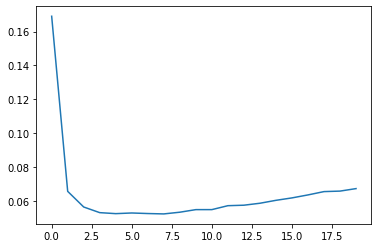

In [15]:
plt.plot(history.history['loss'])

In [16]:
model.evaluate(X_test,y_test)

2328/2328 [==============================] - 4s 2ms/step - loss: 0.0702 - accuracy: 0.9828


[0.07019499689340591, 0.9828030467033386]